In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Pivotted_final_updated.csv")

In [4]:
# df.describe()

In [5]:
# df = df.drop("Unnamed: 0", axis= 1)

In [6]:
# df.shape

In [7]:
df.head()

,Unnamed: 0,Year,continents,Area,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),...,Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Prevalence of severe food insecurity in the female adult population (percent) (3-year average),Prevalence of severe food insecurity in the male adult population (percent) (3-year average),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,0,2000,Africa,Algeria,2308.0,126.0,67.0,77.7,19.3,79.7,...,NaN,NaN,13.4,NaN,NaN,NaN,7.5,0.2,59.0,13.0
1,1,2000,Africa,Angola,2121.0,74.0,39.4,40.9,12.8,57.1,...,NaN,NaN,5.3,NaN,NaN,NaN,67.4,NaN,66.0,7.0
2,2,2000,Africa,Benin,2165.0,108.0,48.5,56.2,9.5,13.0,...,NaN,NaN,4.5,NaN,NaN,NaN,17.2,NaN,72.0,59.0
3,3,2000,Africa,Botswana,2286.0,98.0,48.4,66.5,25.6,90.9,...,NaN,NaN,10.0,NaN,NaN,NaN,23.7,NaN,50.0,12.0
4,4,2000,Africa,Burkina Faso,2183.0,108.0,53.2,69.6,9.7,9.0,...,NaN,NaN,1.4,NaN,NaN,NaN,22.7,0.2,65.0,52.0


## Remove irrelevant columns

In [8]:
# Remove intuitively identical columns
cols_to_drop = ["Average dietary energy supply adequacy (percent) (3-year average)",
                "Minimum dietary energy requirement  (kcal/cap/day)",
                "Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)",
                "Number of people undernourished (million) (3-year average)",
                "Coefficient of variation of habitual caloric consumption distribution (real number)",
                "Number of moderately or severely food insecure female adults (million) (3-year average)",
                "Number of moderately or severely food insecure male adults (million) (3-year average)",
                "Number of moderately or severely food insecure people (million) (3-year average)",
                "Number of children under 5 years of age who are stunted (modeled estimates) (million)",
                "Number of children under 5 years affected by wasting (million)",
                "Number of children under 5 years of age who are overweight (modeled estimates) (million)",
                "Number of severely food insecure people (million) (3-year average)",
                "Number of severely food insecure female adults (million) (3-year average)",
                "Number of severely food insecure male adults (million) (3-year average)",
                "Number of newborns with low birthweight (million)",
                "Number of women of reproductive age (15-49 years) affected by anemia (million)",
                "Number of obese adults (18 years and older) (million)"
                ]



In [9]:
df = df.drop(columns= cols_to_drop, axis=1)

### -----------------------------------------------------------------------------------------------------------------------

## Subset the data based on scope (2014-2023)

In [10]:
df_new = df[df["Year"]>=2014].reset_index()

In [11]:
df_new = df_new.drop(["Unnamed: 0","index"] , axis =1)

## Check missing count and drop varibles

In [12]:
# Shows number and percentage of missing values for each column
missing_counts = df_new.isnull().sum()
missing_percent = (df_new.isnull().sum() / len(df_new)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

missing_df

,Missing Count,Missing %
Rail lines density (total route in km per 100 square km of land area),1078,68.66
Percentage of population using safely managed drinking water services (percent),678,43.18
Prevalence of anemia among women of reproductive age (15-49 years) (percent),628,40.00
Percentage of population using safely managed sanitation services (percent),622,39.62
Prevalence of low birthweight (percent),471,30.00
Prevalence of severe food insecurity in the female adult population (percent) (3-year average),430,27.39
Prevalence of severe food insecurity in the male adult population (percent) (3-year average),430,27.39
Prevalence of severe food insecurity in the total population (percent) (3-year average),427,27.20
Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average),420,26.75
Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average),420,26.75


In [13]:
## Drop due to high missing percentage

columns_to_remove = [
    "Rail lines density (total route in km per 100 square km of land area)",
    "Prevalence of low birthweight (percent)",
    "Prevalence of anemia among women of reproductive age (15-49 years) (percent)",
    "Percentage of population using safely managed sanitation services (percent)",
    "Percentage of population using safely managed drinking water services (percent)"
]

df_new = df_new.drop(columns=columns_to_remove)

### Dropping and aggreagating

In [14]:
# cols = ["Percentage of population using at least basic drinking water services (percent)",
#     "Percentage of population using at least basic sanitation services (percent)",
#     "Percentage of population using safely managed drinking water services (percent)",
#     "Percentage of population using safely managed sanitation services (percent)"]

In [15]:
df_new["Water & Sanitation Index (percent)"] = df_new[[
    "Percentage of population using at least basic drinking water services (percent)",
    "Percentage of population using at least basic sanitation services (percent)"
]].mean(axis=1)

df_new["Moderate+Severe Food Insecurity (percent)"] = df_new[[
    "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)"
]].mean(axis=1)  


df_new["Severe Food Insecurity (percent)"] = df_new[[
    "Prevalence of severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the male adult population (percent) (3-year average)"
]].mean(axis=1) 

In [16]:
columns_to_remove = [
    "Prevalence of severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the male adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)",
    "Percentage of population using at least basic drinking water services (percent)",
    "Percentage of population using at least basic sanitation services (percent)"
]

# Drop the specified columns
df_new = df_new.drop(columns=columns_to_remove)

## Create a series of missing data indicator for checking MAR assumption

In [17]:
for col in df_new.columns:
    df_new[f'{col}_missing'] = df_new[col].isnull().astype(int)

In [18]:
# Check corraltion between missing data indicator and other variables
excluded_columns = ['Year', 'continents', 'Area']  
df_filtered = df_new.drop(columns=excluded_columns)


correlation_matrix = df_filtered.corr()

In [19]:
# Just print the need part for corraltion checking 

missing_columns = [col for col in df_new.columns if col.endswith('_missing') and col not in ['Year_missing', 'continents_missing', 'Area_missing']]
cor_missingness = correlation_matrix[missing_columns]

df_corr = cor_missingness


In [20]:
df_corr_filtered = df_corr[~df_corr.index.str.endswith('_missing')]
# df_corr_filtered

In [21]:
## For documentation
df_corr.to_csv("missing_corr.csv", index= True)
df_corr_filtered.to_csv("missing_corr_with_other_variables_only.csv", index= True)

In [22]:
# Check correlation between missing indicator and the variables (plot 1)

# df_corr_filtered.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

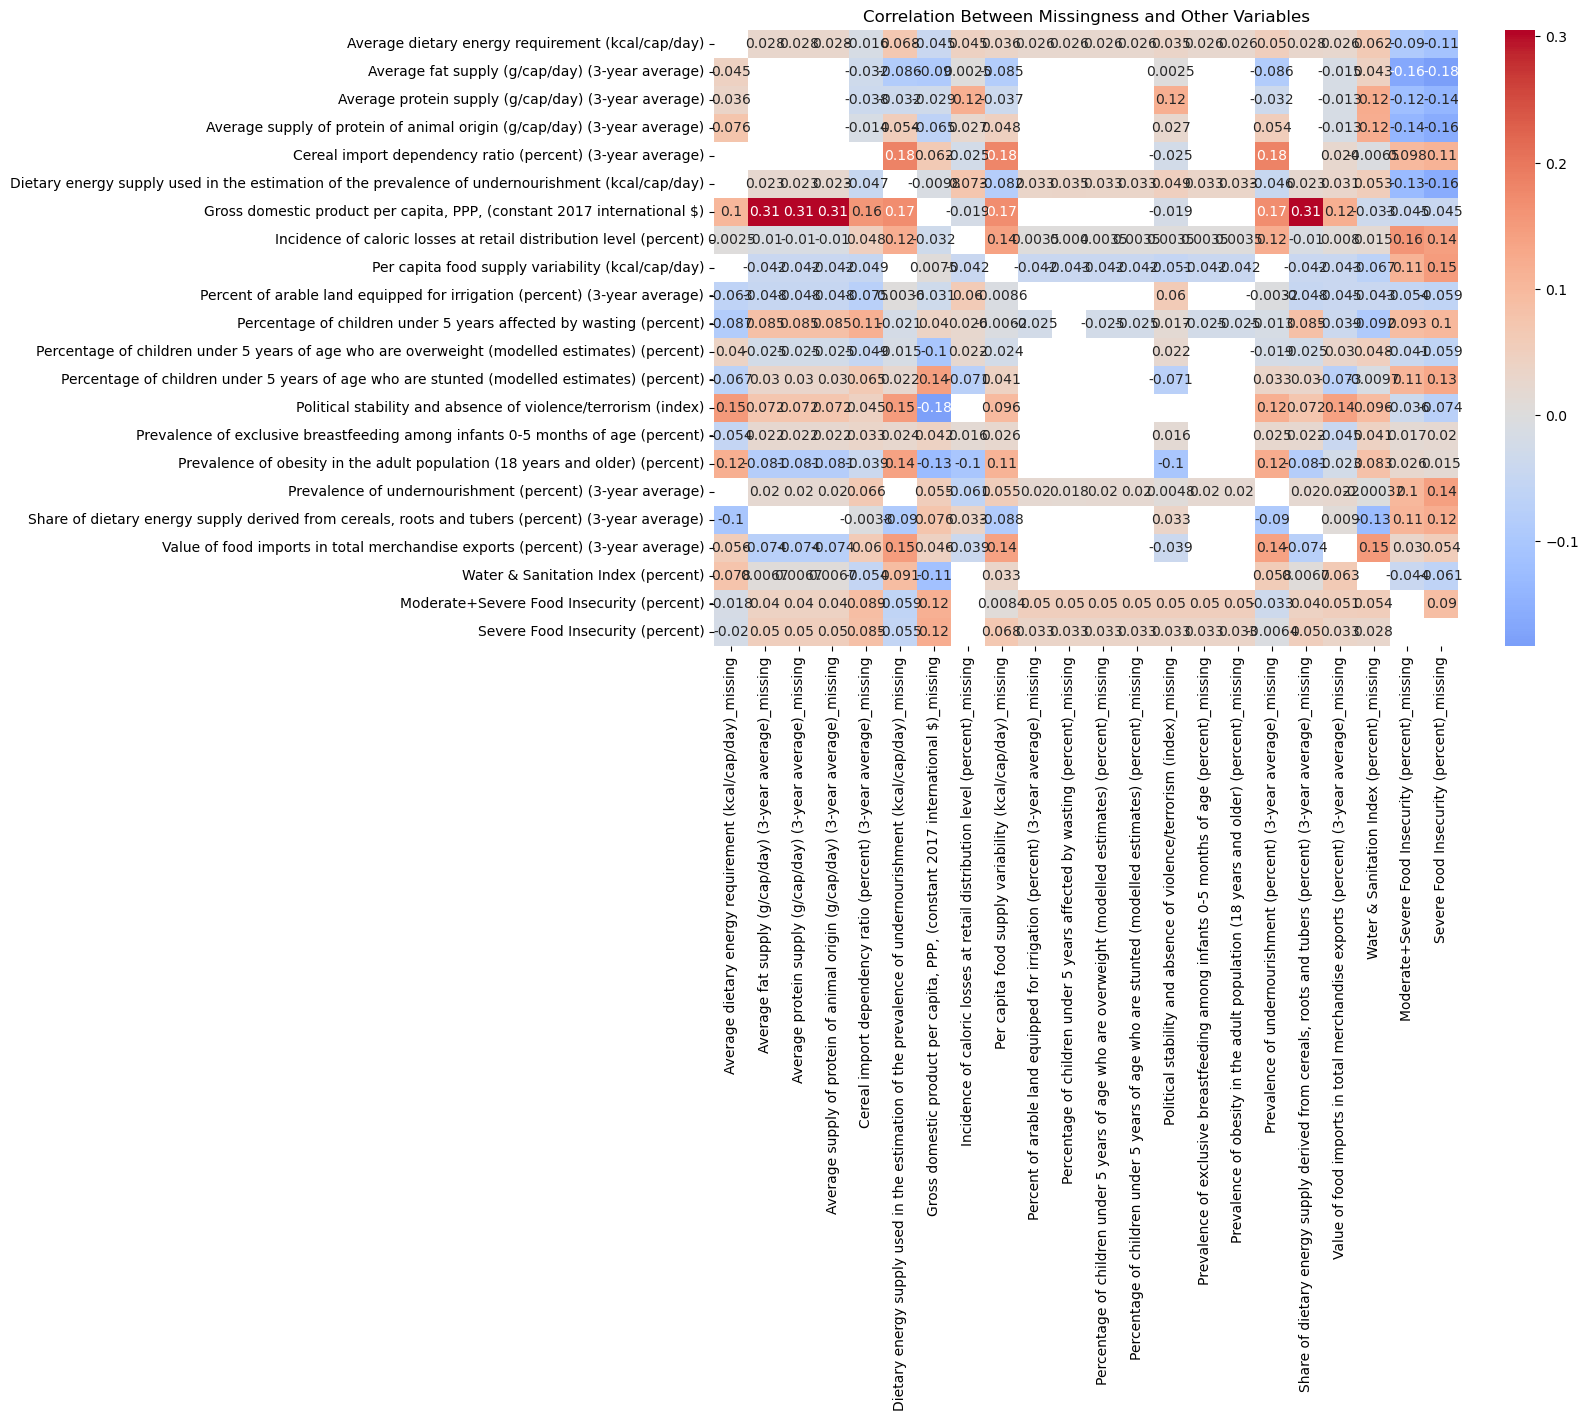

In [23]:
# Check correlation between missing indicator and the variables (plot 2)

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_filtered, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Missingness and Other Variables')
plt.show()

## df_new is for modelling, df is for EDA
## Check missingness after dropping and aggregating 

In [24]:
## Checking missingness after dropping and aggregating 
missing_counts = df_new.isnull().sum()
missing_percent = (df_new.isnull().sum() / len(df_new)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

missing_df

,Missing Count,Missing %
Severe Food Insecurity (percent),423,26.94
Moderate+Severe Food Insecurity (percent),413,26.31
Cereal import dependency ratio (percent) (3-year average),271,17.26
Average fat supply (g/cap/day) (3-year average),213,13.57
Average protein supply (g/cap/day) (3-year average),213,13.57
Average supply of protein of animal origin (g/cap/day) (3-year average),213,13.57
"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",213,13.57
Water & Sanitation Index (percent),211,13.44
"Gross domestic product per capita, PPP, (constant 2017 international $)",205,13.06
Per capita food supply variability (kcal/cap/day),170,10.83


## Imputation

In [25]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Consider two methods at this step
from sklearn.linear_model import BayesianRidge 
from sklearn.ensemble import RandomForestRegressor


In [26]:
# Define the target columns (missingness between 9% -30%)
columns_to_impute = [
    'Severe Food Insecurity (percent)',
    'Moderate+Severe Food Insecurity (percent)',
    'Cereal import dependency ratio (percent) (3-year average)',
    'Average fat supply (g/cap/day) (3-year average)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
    'Water & Sanitation Index (percent)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Per capita food supply variability (kcal/cap/day)',
    'Value of food imports in total merchandise exports (percent) (3-year average)',
    'Political stability and absence of violence/terrorism (index)',
    'Prevalence of undernourishment (percent) (3-year average)',
    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
    'Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)',
    'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Prevalence of obesity in the adult population (18 years and older) (percent)',
    'Percentage of children under 5 years affected by wasting (percent)',
    'Average dietary energy requirement (kcal/cap/day)',
    'Incidence of caloric losses at retail distribution level (percent)'
]


### Group based on country for temporal consistency

#### Use BayesianRidge for imputation

In [27]:
# Filter out the columns to be imputed
df_subset = df_new[columns_to_impute].copy()

# Initialize MICE
br_imputer = IterativeImputer(
    estimator=BayesianRidge(),  # Chosen because of the linear relationship between variables
    max_iter=10,                
    random_state=42,
    imputation_order='ascending' 
) 

# Fit and transform the data
df_br_imputed = pd.DataFrame(br_imputer.fit_transform(df_subset), columns=columns_to_impute)

c:\Users\chew1\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [28]:
df_br_imputed.head()

,Severe Food Insecurity (percent),Moderate+Severe Food Insecurity (percent),Cereal import dependency ratio (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Water & Sanitation Index (percent),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),...,Prevalence of undernourishment (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percent of arable land equipped for irrigation (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Percentage of children under 5 years affected by wasting (percent),Average dietary energy requirement (kcal/cap/day),Incidence of caloric losses at retail distribution level (percent)
0,13.011111,22.888889,70.2,99.4,94.9,29.8,48.0,90.0,13515.3,45.0,...,2.9,3437.0,11.1,49.2,12.5,0.5,19.7,6.909091,2321.0,3.59
1,14.070843,47.361362,65.6,57.4,55.4,22.0,60.0,50.0,10262.8,168.0,...,13.2,2553.0,34.1,49.2,3.1,0.1,9.0,6.909091,2129.0,3.92
2,10.444444,55.011111,44.2,51.2,70.1,17.5,66.0,41.0,3104.2,11.0,...,9.3,2656.0,33.1,41.4,1.7,0.3,8.6,4.500000,2204.0,3.50
3,18.433333,46.466667,95.5,74.4,71.7,32.2,48.0,80.5,16381.1,9.0,...,20.8,2550.0,23.2,49.2,10.5,0.0,15.3,6.909091,2334.0,3.14
4,21.377556,58.245463,13.8,61.5,76.4,12.3,65.0,35.5,2094.1,20.0,...,13.5,2648.0,29.9,50.1,1.8,0.2,4.2,8.500000,2198.0,2.17


#### Check linearity for BR imputation

In [29]:
df_subset.corr().style.background_gradient(cmap='coolwarm')

,Severe Food Insecurity (percent),Moderate+Severe Food Insecurity (percent),Cereal import dependency ratio (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Water & Sanitation Index (percent),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Political stability and absence of violence/terrorism (index),Prevalence of undernourishment (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percent of arable land equipped for irrigation (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Percentage of children under 5 years affected by wasting (percent),Average dietary energy requirement (kcal/cap/day),Incidence of caloric losses at retail distribution level (percent)
Severe Food Insecurity (percent),1.000000,0.882194,0.220672,-0.519023,-0.608470,-0.557727,0.448792,-0.704035,-0.486487,-0.065277,0.201611,-0.421686,0.761951,-0.656252,0.557103,0.096123,-0.260780,-0.179297,-0.335197,0.188906,-0.592760,0.469593
Moderate+Severe Food Insecurity (percent),0.882194,1.000000,0.228364,-0.700975,-0.749414,-0.726044,0.633780,-0.831335,-0.646042,-0.013460,0.279621,-0.494230,0.812491,-0.791681,0.688090,0.149993,-0.376325,-0.200222,-0.384044,0.250663,-0.735427,0.521298
Cereal import dependency ratio (percent) (3-year average),0.220672,0.228364,1.000000,-0.135492,-0.125081,-0.136590,0.061546,-0.075331,-0.057537,0.009816,0.236614,-0.026678,0.178126,-0.127367,0.108031,0.007634,-0.016485,0.037502,0.075146,0.108004,-0.072036,0.202516
Average fat supply (g/cap/day) (3-year average),-0.519023,-0.700975,-0.135492,1.000000,0.806395,0.870435,-0.856342,0.678346,0.768722,-0.028573,-0.244987,0.539945,-0.627626,0.823038,-0.700713,-0.243879,0.430981,0.009686,0.415154,-0.373717,0.764099,-0.543364
Average protein supply (g/cap/day) (3-year average),-0.608470,-0.749414,-0.125081,0.806395,1.000000,0.908567,-0.730768,0.717874,0.694200,-0.060138,-0.201111,0.538180,-0.754358,0.890474,-0.708398,-0.199087,0.454866,0.055253,0.423783,-0.303771,0.764230,-0.415113
Average supply of protein of animal origin (g/cap/day) (3-year average),-0.557727,-0.726044,-0.136590,0.870435,0.908567,1.000000,-0.864460,0.732567,0.756858,-0.028565,-0.172972,0.649952,-0.644461,0.809423,-0.744034,-0.211068,0.427915,0.008063,0.464735,-0.438217,0.805326,-0.420884
"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",0.448792,0.633780,0.061546,-0.856342,-0.730768,-0.864460,1.000000,-0.733348,-0.672861,0.013322,0.088879,-0.583973,0.543722,-0.693306,0.735810,0.241684,-0.430391,0.030617,-0.556496,0.508727,-0.790086,0.361528
Water & Sanitation Index (percent),-0.704035,-0.831335,-0.075331,0.678346,0.717874,0.732567,-0.733348,1.000000,0.577585,-0.084896,-0.189078,0.538497,-0.757444,0.765340,-0.776032,-0.135835,0.540486,0.229612,0.655974,-0.425065,0.799497,-0.418600
"Gross domestic product per capita, PPP, (constant 2017 international $)",-0.486487,-0.646042,-0.057537,0.768722,0.694200,0.756858,-0.672861,0.577585,1.000000,0.016129,-0.245895,0.590957,-0.510088,0.710604,-0.577782,-0.176589,0.251744,-0.000567,0.276560,-0.242105,0.725929,-0.389912
Per capita food supply variability (kcal/cap/day),-0.065277,-0.013460,0.009816,-0.028573,-0.060138,-0.028565,0.013322,-0.084896,0.016129,1.000000,-

### Compared with RandomForestRegressor

In [30]:
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(df_subset), columns=columns_to_impute)

c:\Users\chew1\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [31]:
df_rf_imputed.head()

,Severe Food Insecurity (percent),Moderate+Severe Food Insecurity (percent),Cereal import dependency ratio (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Water & Sanitation Index (percent),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),...,Prevalence of undernourishment (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percent of arable land equipped for irrigation (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Percentage of children under 5 years affected by wasting (percent),Average dietary energy requirement (kcal/cap/day),Incidence of caloric losses at retail distribution level (percent)
0,13.011111,22.888889,70.2,99.4,94.9,29.8,48.0,90.0,13515.3,45.0,...,2.9,3437.0,11.1,49.2,12.5,0.5,19.7,6.909091,2321.0,3.59
1,17.918111,54.984556,65.6,57.4,55.4,22.0,60.0,50.0,10262.8,168.0,...,13.2,2553.0,34.1,49.2,3.1,0.1,9.0,6.909091,2129.0,3.92
2,10.444444,55.011111,44.2,51.2,70.1,17.5,66.0,41.0,3104.2,11.0,...,9.3,2656.0,33.1,41.4,1.7,0.3,8.6,4.500000,2204.0,3.50
3,18.433333,46.466667,95.5,74.4,71.7,32.2,48.0,80.5,16381.1,9.0,...,20.8,2550.0,23.2,49.2,10.5,0.0,15.3,6.909091,2334.0,3.14
4,14.572000,58.199778,13.8,61.5,76.4,12.3,65.0,35.5,2094.1,20.0,...,13.5,2648.0,29.9,50.1,1.8,0.2,4.2,8.500000,2198.0,2.17


## KDE distribution plot

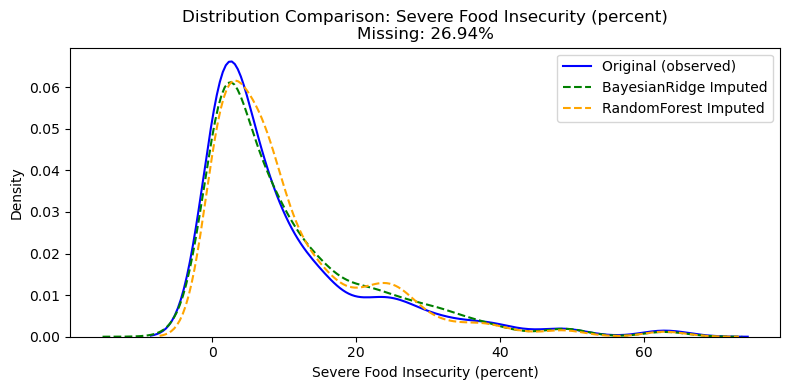

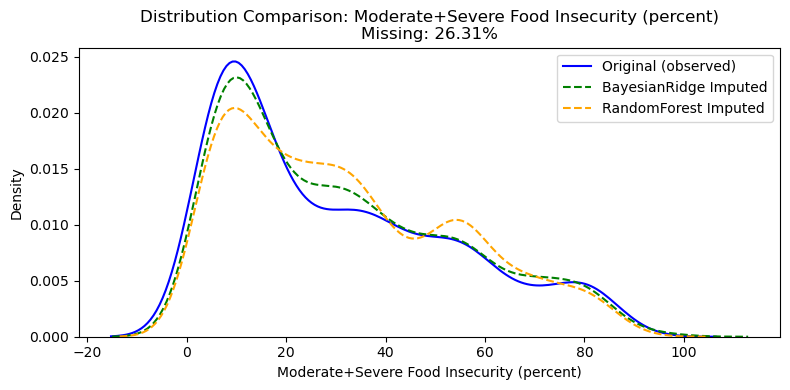

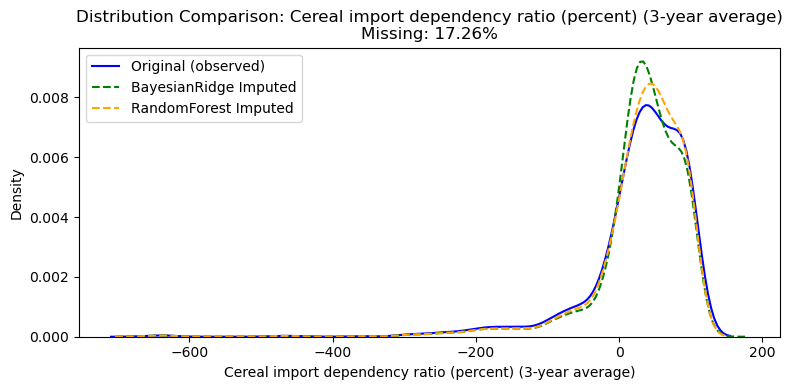

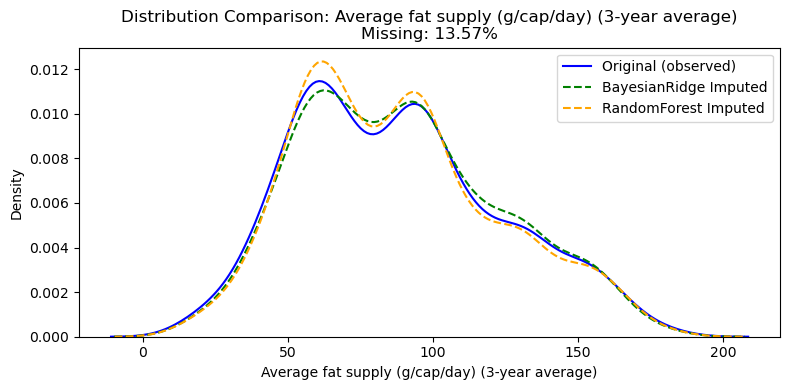

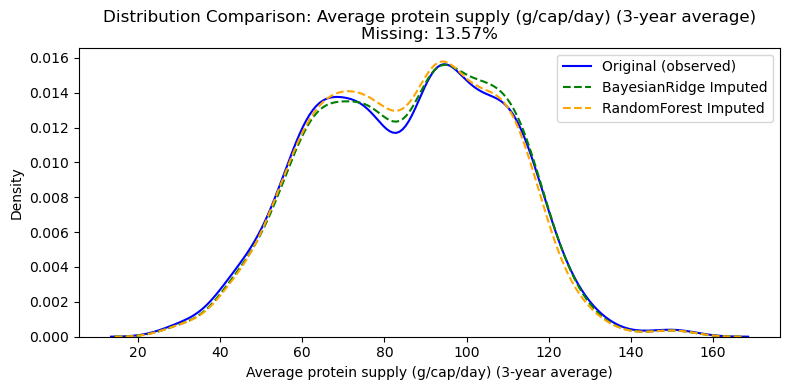

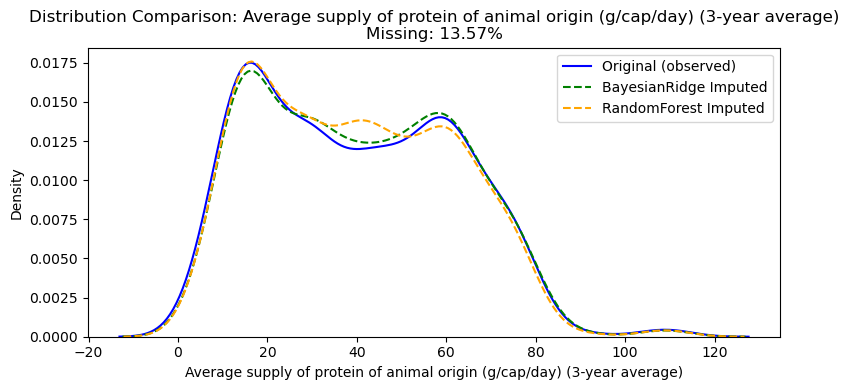

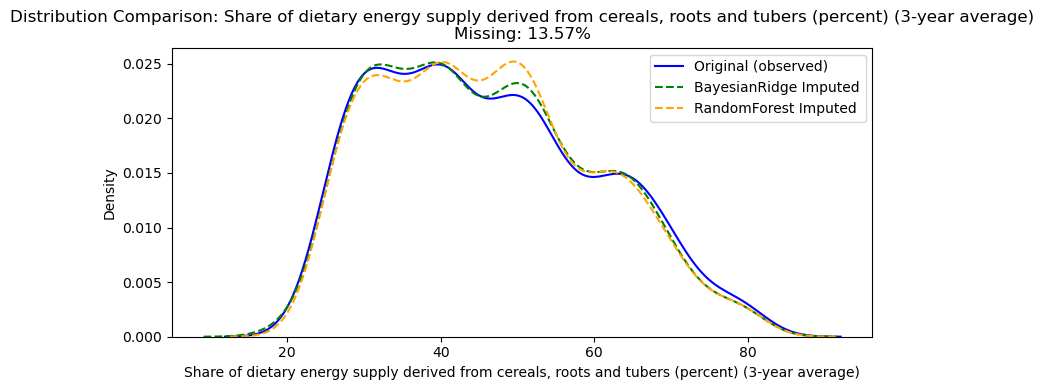

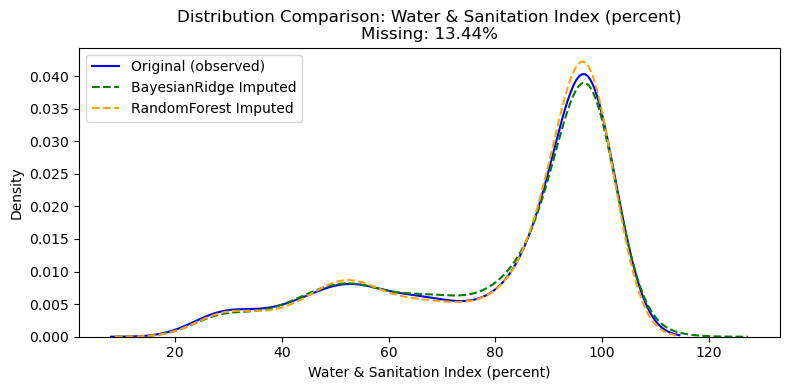

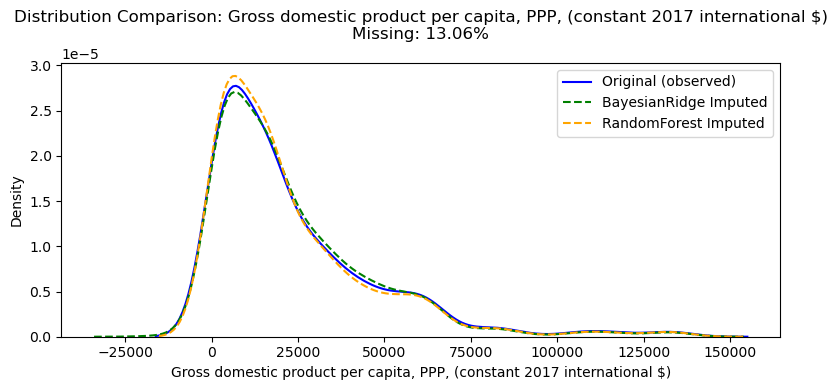

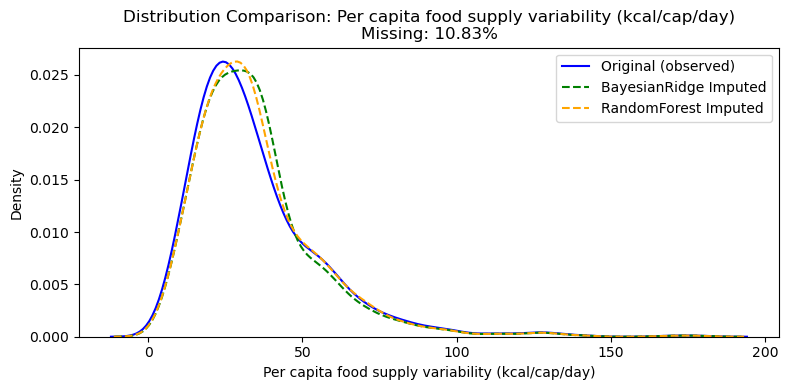

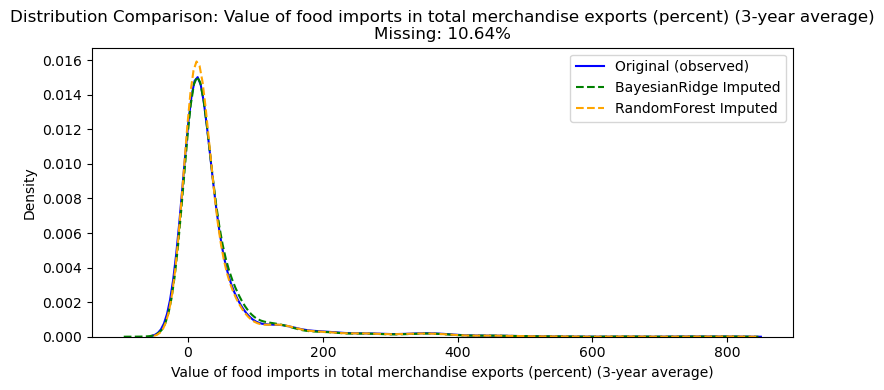

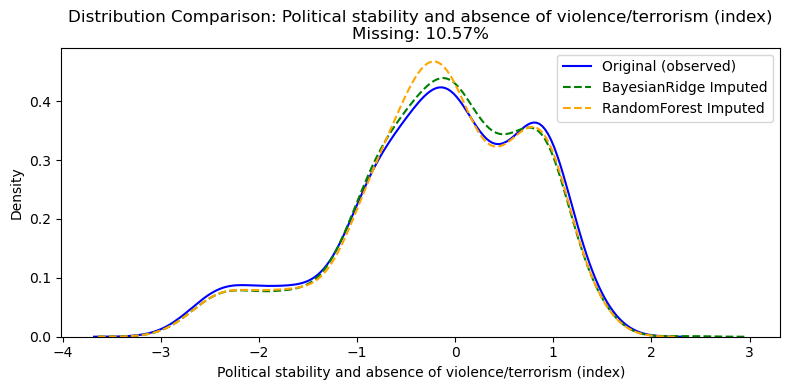

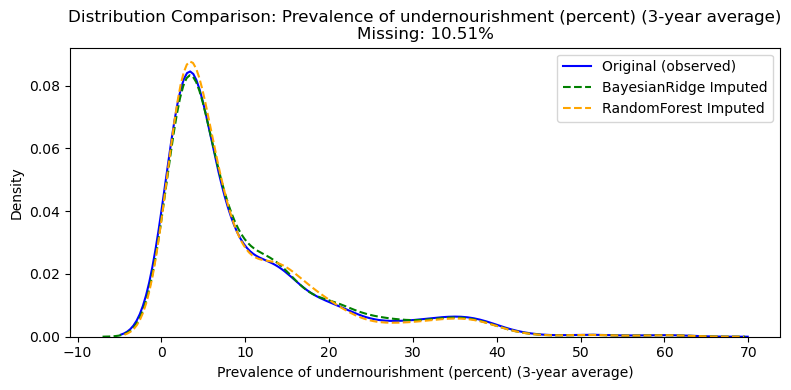

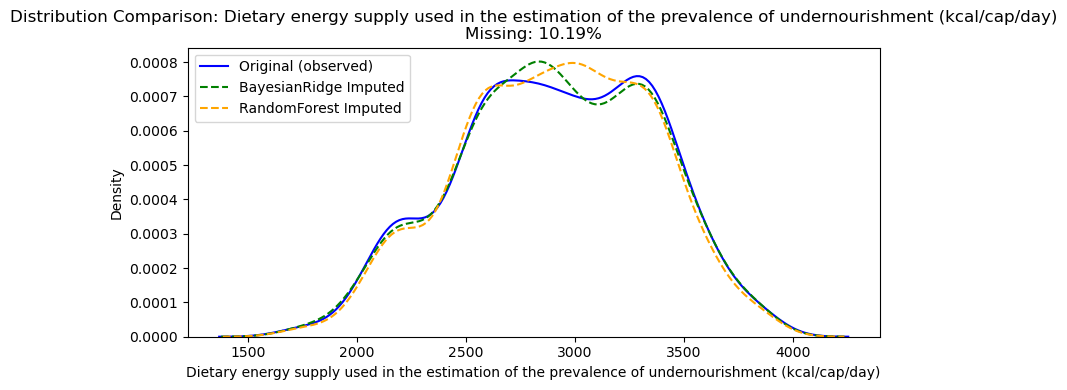

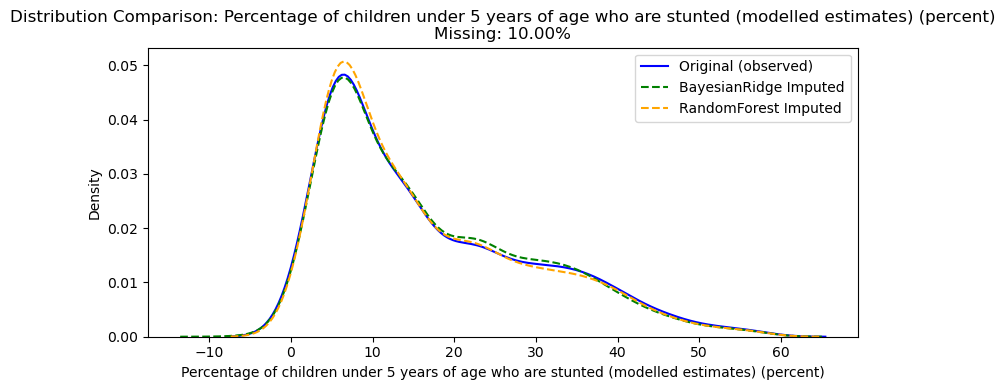

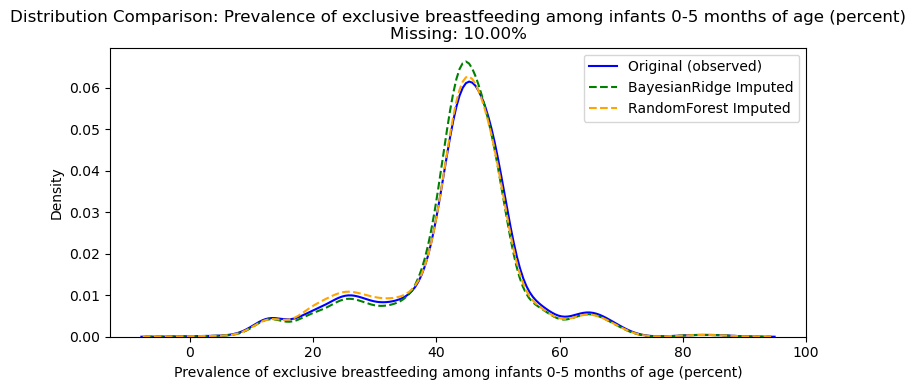

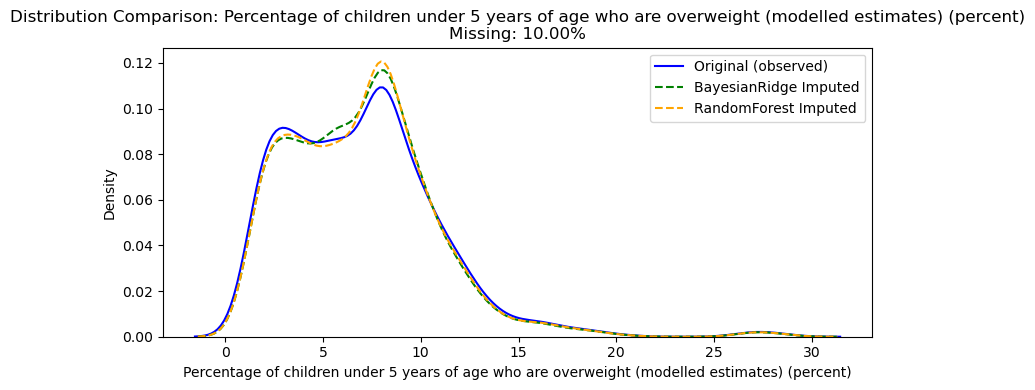

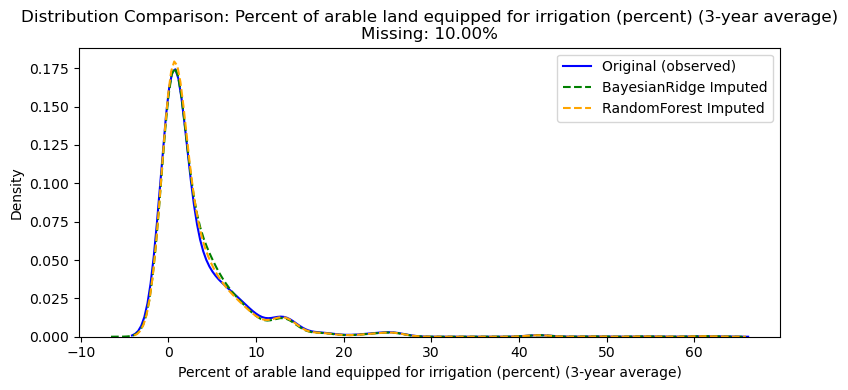

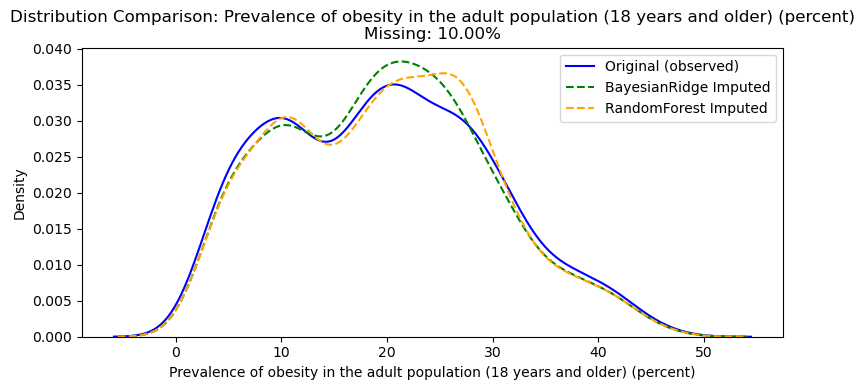

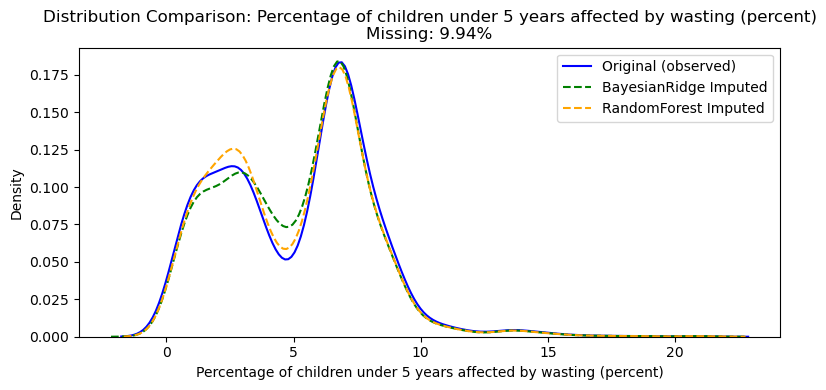

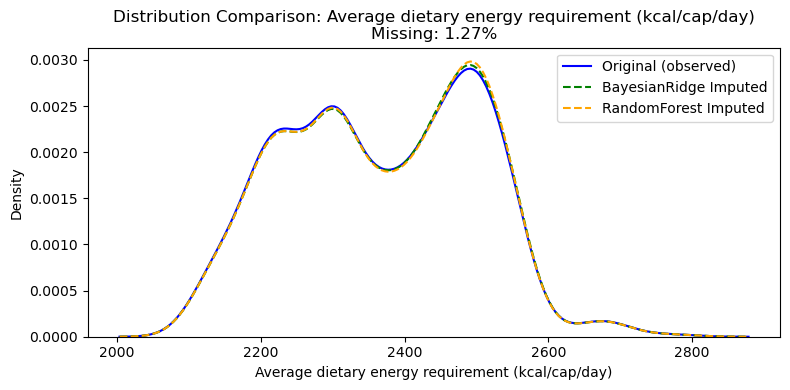

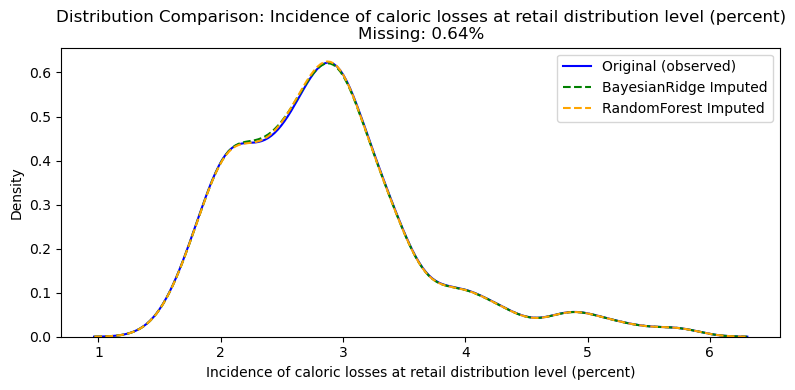

In [32]:
# Check every variable
for col in columns_to_impute:
    plt.figure(figsize=(8, 4))
    
    missing_pct = df_subset[col].isna().mean() * 100

    # Compare between the non-nulls and imputed
    sns.kdeplot(df_subset[col].dropna(), label='Original (observed)', color='blue')
    
    # Plot imputed full distributions (includes imputed + original)
    sns.kdeplot(df_br_imputed[col], label='BayesianRidge Imputed', color='green', linestyle='--')
    sns.kdeplot(df_rf_imputed[col], label='RandomForest Imputed', color='orange', linestyle='--')
    
    plt.title(f'Distribution Comparison: {col}\nMissing: {missing_pct:.2f}%')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Decide on the imputation method

### So the point is based on the above distribution, decide to use either method on each variable to get best result.

After the imputation, i will proceed to aggregate some variables.

I deleted and aggregated some in the very beginning because it would not affect the imputation and it makes things easier without deviating from the original data. (as in the scale/ range would not change, eventhough the value itself is a sum/mean of certain variables.) and yes, it will cause a few outliers if we aggregate columns with NA and non-null value, but after inspection, it is only a few cases so it wont be an issue

In [33]:
## Separate columns to impute based on estimator performance
br_columns = [
    'Severe Food Insecurity (percent)',
    'Moderate+Severe Food Insecurity (percent)',
    'Average fat supply (g/cap/day) (3-year average)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
    'Water & Sanitation Index (percent)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Value of food imports in total merchandise exports (percent) (3-year average)',
    'Political stability and absence of violence/terrorism (index)',
    'Prevalence of undernourishment (percent) (3-year average)',
    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)'
]

rf_columns = [col for col in columns_to_impute if col not in br_columns]

In [34]:
## Substitute different imputation into the df
df_final_imputed = df_subset.copy()

for col in br_columns:
    df_final_imputed[col] = df_br_imputed[col]

for col in rf_columns:
    df_final_imputed[col] = df_rf_imputed[col]

In [35]:
df_non_imputed = df_new.drop(columns=columns_to_impute)
df_cleaned = pd.concat([df_non_imputed, df_final_imputed], axis=1)


df_cleaned = df_cleaned[df_new.columns]
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_missing')])


In [36]:
df_cleaned.isna().sum()

Year                                                                                                 0
continents                                                                                           0
Area                                                                                                 0
Average dietary energy requirement (kcal/cap/day)                                                    0
Average fat supply (g/cap/day) (3-year average)                                                      0
Average protein supply (g/cap/day) (3-year average)                                                  0
Average supply of protein of animal origin (g/cap/day) (3-year average)                              0
Cereal import dependency ratio (percent) (3-year average)                                            0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)    0
Gross domestic product per capita, PPP, (constant 2017 international $)  

## Final saved files is df_cleaned

In [37]:
df_cleaned.to_csv("cleaned_for_eda.csv")

## Check range to view if imputation is valid

In [38]:
import pandas as pd
df_cleaned = pd.read_csv("cleaned_for_eda.csv")

In [39]:
for col in df_cleaned.columns:
    col_min = df_cleaned[col].min()
    col_max = df_cleaned[col].max()
    print(f"{col}: min = {col_min}, max = {col_max}")

Unnamed: 0: min = 0, max = 1569
Year: min = 2014, max = 2023
continents: min = Africa, max = South_America
Area: min = Afghanistan, max = Zimbabwe
Average dietary energy requirement (kcal/cap/day): min = 2095.0, max = 2787.0
Average fat supply (g/cap/day) (3-year average): min = 14.1, max = 183.6
Average protein supply (g/cap/day) (3-year average): min = 29.6, max = 152.4
Average supply of protein of animal origin (g/cap/day) (3-year average): min = 2.6, max = 111.9
Cereal import dependency ratio (percent) (3-year average): min = -654.8, max = 100.0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day): min = 1685.0, max = 3936.0
Gross domestic product per capita, PPP, (constant 2017 international $): min = -17997.991104419838, max = 137947.0
Incidence of caloric losses at retail distribution level (percent): min = 1.51, max = 5.76
Per capita food supply variability (kcal/cap/day): min = 3.0, max = 179.0
Percent of arable land equipped for ir

In [48]:
invalid_conditions = {
    'Gross domestic product per capita, PPP, (constant 2017 international $)': lambda x: x < 0,
    'Percent of arable land equipped for irrigation (percent) (3-year average)': lambda x: x < 0,
    'Prevalence of undernourishment (percent) (3-year average)': lambda x: x < 0,
    'Value of food imports in total merchandise exports (percent) (3-year average)': lambda x: x < 0,
    'Severe Food Insecurity (percent)': lambda x: x < 0,
    'Water & Sanitation Index (percent)': lambda x: x > 100
}

# Loop and print invalid values for each column
for col, condition in invalid_conditions.items():
    invalid_rows = df_new[condition(df_new[col])]
    if not invalid_rows.empty:
        print(f"\nInvalid values for: {col}")
        print(invalid_rows[[col]])

In [52]:
# Loop and print invalid values for each column
for col, condition in invalid_conditions.items():
    invalid_rows = df_cleaned[condition(df_cleaned[col])]
    if not invalid_rows.empty:
        print(f"\nInvalid values for: {col}")
        print(invalid_rows[[col]])

### Clipping range so that is it bounded in valid range

In [49]:
clip_ranges = {
    "Gross domestic product per capita, PPP, (constant 2017 international $)": (0, None),
    "Percent of arable land equipped for irrigation (percent) (3-year average)": (0, 100),
    "Prevalence of undernourishment (percent) (3-year average)": (0, 100),
    "Value of food imports in total merchandise exports (percent) (3-year average)": (0, None),  # actual max if needed
    'Severe Food Insecurity (percent)':(0,100),
    'Water & Sanitation Index (percent)': (0,100)
}

# Apply clipping to each column
for col, (low, high) in clip_ranges.items():
    df_final_imputed[col] = df_final_imputed[col].clip(lower=low, upper=high)

In [50]:
df_non_imputed = df_new.drop(columns=columns_to_impute)
df_cleaned = pd.concat([df_non_imputed, df_final_imputed], axis=1)


df_cleaned = df_cleaned[df_new.columns]
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_missing')])

In [44]:
df_cleaned.isna().sum()

Year                                                                                                 0
continents                                                                                           0
Area                                                                                                 0
Average dietary energy requirement (kcal/cap/day)                                                    0
Average fat supply (g/cap/day) (3-year average)                                                      0
Average protein supply (g/cap/day) (3-year average)                                                  0
Average supply of protein of animal origin (g/cap/day) (3-year average)                              0
Cereal import dependency ratio (percent) (3-year average)                                            0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)    0
Gross domestic product per capita, PPP, (constant 2017 international $)  

In [51]:
for col in df_cleaned.columns:
    col_min = df_cleaned[col].min()
    col_max = df_cleaned[col].max()
    print(f"{col}: min = {col_min}, max = {col_max}")

Year: min = 2014, max = 2023
continents: min = Africa, max = South_America
Area: min = Afghanistan, max = Zimbabwe
Average dietary energy requirement (kcal/cap/day): min = 2095.0, max = 2787.0
Average fat supply (g/cap/day) (3-year average): min = 14.1, max = 183.6
Average protein supply (g/cap/day) (3-year average): min = 29.6, max = 152.4
Average supply of protein of animal origin (g/cap/day) (3-year average): min = 2.6, max = 111.9
Cereal import dependency ratio (percent) (3-year average): min = -654.8, max = 100.0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day): min = 1685.0, max = 3936.0
Gross domestic product per capita, PPP, (constant 2017 international $): min = 0.0, max = 137947.0
Incidence of caloric losses at retail distribution level (percent): min = 1.51, max = 5.76
Per capita food supply variability (kcal/cap/day): min = 3.0, max = 179.0
Percent of arable land equipped for irrigation (percent) (3-year average): min = 0.0, 

In [54]:
df_cleaned.to_csv("cleaned_for_eda_9_Jun.csv",index=False)